Funmi Adeyo - Big Data and Visualisation Coursework

Find and Import Spark

In [52]:
import findspark
findspark.init(r"C:\Users\user\spark-3.1.2-bin-hadoop2.7")
import pyspark
findspark.find()

'C:\\Users\\user\\spark-3.1.2-bin-hadoop2.7'

Create spark sesssion

In [53]:
from pyspark.sql import SparkSession
spark = SparkSession.builder.appName("Apartment Data Analysis").getOrCreate()

Read the file

In [180]:
data = spark.read.option('header','true').option('inferSchema','true').csv("apartment_data.csv")

Check the column names and the data type for each one

In [12]:
data.printSchema()

root
 |-- SalePrice: integer (nullable = true)
 |-- YearBuilt: integer (nullable = true)
 |-- YrSold: integer (nullable = true)
 |-- MonthSold: integer (nullable = true)
 |-- Size(sqf): integer (nullable = true)
 |-- Floor: integer (nullable = true)
 |-- HallwayType: string (nullable = true)
 |-- HeatingType: string (nullable = true)
 |-- AptManageType: string (nullable = true)
 |-- N_Parkinglot(Ground): double (nullable = true)
 |-- N_Parkinglot(Basement): double (nullable = true)
 |-- TimeToBusStop: string (nullable = true)
 |-- TimeToSubway: string (nullable = true)
 |-- N_APT: double (nullable = true)
 |-- N_manager: double (nullable = true)
 |-- N_elevators: double (nullable = true)
 |-- SubwayStation: string (nullable = true)
 |-- N_FacilitiesNearBy(PublicOffice): double (nullable = true)
 |-- N_FacilitiesNearBy(Hospital): integer (nullable = true)
 |-- N_FacilitiesNearBy(Dpartmentstore): double (nullable = true)
 |-- N_FacilitiesNearBy(Mall): double (nullable = true)
 |-- N_Faci

See the first row

In [4]:
data.head()

Row(SalePrice=141592, YearBuilt=2006, YrSold=2007, MonthSold=8, Size(sqf)=814, Floor=3, HallwayType='terraced', HeatingType='individual_heating', AptManageType='management_in_trust', N_Parkinglot(Ground)=111.0, N_Parkinglot(Basement)=184.0, TimeToBusStop='5min~10min', TimeToSubway='10min~15min', N_APT=3.0, N_manager=3.0, N_elevators=0.0, SubwayStation='Kyungbuk_uni_hospital', N_FacilitiesNearBy(PublicOffice)=2.0, N_FacilitiesNearBy(Hospital)=1, N_FacilitiesNearBy(Dpartmentstore)=1.0, N_FacilitiesNearBy(Mall)=1.0, N_FacilitiesNearBy(ETC)=1.0, N_FacilitiesNearBy(Park)=0.0, N_SchoolNearBy(Elementary)=3.0, N_SchoolNearBy(Middle)=2.0, N_SchoolNearBy(High)=2.0, N_SchoolNearBy(University)=2.0, N_FacilitiesInApt=5, N_FacilitiesNearBy(Total)=6.0, N_SchoolNearBy(Total)=9.0)

Number of rows

In [146]:
data.count()

5891

Summary for numerical variables

In [182]:
#Drop the categorical 
numColsData = data.drop('HallwayType', 'HeatingType', 'AptManageType', 'TimeToBusStop', 'TimeToSubway',
           'SubwayStation','YearBuilt', 'YrSold', 'MonthSold')

#IShow description for each variable
for col in numColsData.columns:
    data.describe([col]).show()

+-------+------------------+
|summary|         SalePrice|
+-------+------------------+
|  count|              5891|
|   mean| 221218.1125445595|
| stddev|106384.18644622664|
|    min|             32743|
|    max|            585840|
+-------+------------------+

+-------+------------------+
|summary|         Size(sqf)|
+-------+------------------+
|  count|              5891|
|   mean| 955.5691733152266|
| stddev|382.46405039000143|
|    min|               135|
|    max|              2337|
+-------+------------------+

+-------+------------------+
|summary|             Floor|
+-------+------------------+
|  count|              5891|
|   mean|12.026311322356136|
| stddev| 7.548742817389914|
|    min|                 1|
|    max|                43|
+-------+------------------+

+-------+--------------------+
|summary|N_Parkinglot(Ground)|
+-------+--------------------+
|  count|                5891|
|   mean|  195.88355117976573|
| stddev|  218.59721008604822|
|    min|                 0.

Summary for categorical variables

In [20]:
#select the categorical variables
catColsData = data.select('HallwayType', 'HeatingType', 'AptManageType', 'TimeToBusStop', 'TimeToSubway',
           'SubwayStation','YearBuilt', 'YrSold', 'MonthSold')

#Show group then count for each one
for col in catColsData.columns:
    data.groupBy([col]).count().show()

+-----------+-----+
|HallwayType|count|
+-----------+-----+
|      mixed| 1690|
|   terraced| 3564|
|   corridor|  637|
+-----------+-----+

+------------------+-----+
|       HeatingType|count|
+------------------+-----+
|   central_heating|  300|
|individual_heating| 5591|
+------------------+-----+

+-------------------+-----+
|      AptManageType|count|
+-------------------+-----+
|management_in_trust| 5542|
|    self_management|  349|
+-------------------+-----+

+-------------+-----+
|TimeToBusStop|count|
+-------------+-----+
|       0~5min| 4509|
|   5min~10min| 1327|
|  10min~15min|   55|
+-------------+-----+

+------------------+-----+
|      TimeToSubway|count|
+------------------+-----+
|        5min~10min| 1135|
|no_bus_stop_nearby|  238|
|       10min~15min|  806|
|       15min~20min|  953|
|            0-5min| 2759|
+------------------+-----+

+--------------------+-----+
|       SubwayStation|count|
+--------------------+-----+
|Kyungbuk_uni_hosp...| 1644|
|    Chil-su

Correcting error in time to subway category. no_bus_stop_nearby should read no_subway_nearby.
Code adapted from: https://sparkbyexamples.com/pyspark/pyspark-replace-column-values/

In [55]:
#import regexp_replace and use it to replace bustop with subway
from pyspark.sql.functions import regexp_replace
data = data.withColumn('TimeToSubway', regexp_replace('TimeToSubway', 'no_bus_stop_nearby', 'no_subway_nearby'))

In [6]:
#To check replacement worked 
Time_to_subway = data.select("TimeToSubway").distinct().rdd.map(lambda r: r[0]).collect()
print("Time to subway catgories:", Time_to_subway)

Time to subway catgories: ['5min~10min', 'no_subway_nearby', '10min~15min', '15min~20min', '0-5min']


To check if there are missing values

In [7]:
for col in data.columns:
    print(col, "\t", "with null values: ", data.filter(data[col].isNull()).count())

SalePrice 	 with null values:  0
YearBuilt 	 with null values:  0
YrSold 	 with null values:  0
MonthSold 	 with null values:  0
Size(sqf) 	 with null values:  0
Floor 	 with null values:  0
HallwayType 	 with null values:  0
HeatingType 	 with null values:  0
AptManageType 	 with null values:  0
N_Parkinglot(Ground) 	 with null values:  0
N_Parkinglot(Basement) 	 with null values:  0
TimeToBusStop 	 with null values:  0
TimeToSubway 	 with null values:  0
N_APT 	 with null values:  0
N_manager 	 with null values:  0
N_elevators 	 with null values:  0
SubwayStation 	 with null values:  0
N_FacilitiesNearBy(PublicOffice) 	 with null values:  0
N_FacilitiesNearBy(Hospital) 	 with null values:  0
N_FacilitiesNearBy(Dpartmentstore) 	 with null values:  0
N_FacilitiesNearBy(Mall) 	 with null values:  0
N_FacilitiesNearBy(ETC) 	 with null values:  0
N_FacilitiesNearBy(Park) 	 with null values:  0
N_SchoolNearBy(Elementary) 	 with null values:  0
N_SchoolNearBy(Middle) 	 with null values:  0


If there were missing values for example in the sale price:

In [ ]:
#Could delete all the rows with missing values:
data = data.dropna(how="any", subset=["SalePrice"])

In [11]:
#Could calculate the mean sale price and fill all missing values with this.
#Calculate mean sale price
meanSalePrice = data.groupBy().avg("SalePrice").take(1)[0][0]
print("mean Sale Price: ", meanSalePrice)
#Fill missing data with mean sale price
data = data.fillna({'SalePrice': meanSalePrice})

mean Sale Price:  221218.1125445595


To see the correlations between feaures

In [194]:
#import relevant libraries
from pyspark.mllib.stat import Statistics
import pandas as pd

#create function to compute the correlation matrix
def compute_correlation_matrix(df, method='pearson'):
    # wrapper around
    # https://forums.databricks.com/questions/3092/how-to-calculate-correlation-matrix-with-all-colum.html
    df_rdd = df.rdd.map(lambda row: row[0:])
    corr_mat = Statistics.corr(df_rdd, method=method)
    corr_mat_df = pd.DataFrame(corr_mat,
                    columns=df.columns, 
                    index=df.columns)
    return corr_mat_df



In [196]:
#Apply the function using the numerical columns
numData = data.drop('HallwayType', 'HeatingType', 'AptManageType', 'TimeToBusStop', 'TimeToSubway',
           'SubwayStation','MonthSold')
corr = compute_correlation_matrix(numData,method='pearson')
corr

,SalePrice,YearBuilt,YrSold,Size(sqf),Floor,N_Parkinglot(Ground),N_Parkinglot(Basement),N_APT,N_manager,N_elevators,...,N_FacilitiesNearBy(Mall),N_FacilitiesNearBy(ETC),N_FacilitiesNearBy(Park),N_SchoolNearBy(Elementary),N_SchoolNearBy(Middle),N_SchoolNearBy(High),N_SchoolNearBy(University),N_FacilitiesInApt,N_FacilitiesNearBy(Total),N_SchoolNearBy(Total)
SalePrice,1.000000,0.447875,0.357682,0.697199,0.336729,-0.130549,0.473252,0.162684,0.358329,0.208248,...,0.082979,-0.442299,0.310906,-0.341186,-0.166439,-0.371840,-0.403080,0.505282,-0.419763,-0.377904
YearBuilt,0.447875,1.000000,0.255126,0.021282,0.260568,-0.546188,0.589949,0.138750,0.077896,-0.205280,...,0.172809,-0.336293,0.158852,-0.372190,-0.054462,-0.330760,-0.252162,0.592976,-0.414398,-0.293348
YrSold,0.357682,0.255126,1.000000,-0.106142,0.059634,-0.142933,0.191014,0.193475,0.044217,0.130625,...,-0.035147,-0.128280,0.001217,0.013144,-0.055171,-0.056030,-0.027720,0.219188,-0.127048,-0.039018
Size(sqf),0.697199,0.021282,-0.106142,1.000000,0.179491,0.190778,0.176163,0.029303,0.286365,0.244983,...,0.064418,-0.299862,0.206063,-0.228042,-0.145528,-0.257850,-0.292653,0.136406,-0.264944,-0.271667
Floor,0.336729,0.260568,0.059634,0.179491,1.000000,-0.117295,0.334034,0.140585,0.247458,0.025635,...,0.169519,-0.118789,0.137088,-0.120763,0.062544,-0.059192,-0.031314,0.275527,-0.085556,-0.042605
N_Parkinglot(Ground),-0.130549,-0.546188,-0.142933,0.190778,-0.117295,1.000000,-0.386545,0.157956,0.040060,0.564172,...,-0.018016,0.177911,-0.235447,0.030665,-0.129306,0.156957,0.125159,-0.437136,0.120509,0.073379
N_Parkinglot(Basement),0.473252,0.589949,0.191014,0.176163,0.334034,-0.386545,1.000000,0.666546,0.701860,0.191411,...,0.297218,-0.066834,0.299892,0.034619,0.351561,0.057189,0.116077,0.835622,0.040171,0.148652
N_APT,0.162684,0.138750,0.193475,0.029303,0.140585,0.157956,0.666546,1.000000,0.605161,0.512988,...,0.024027,0.328654,-0.149868,0.239352,0.465219,0.370367,0.413276,0.576641,0.245261,0.428775
N_manager,0.358329,0.077896,0.044217,0.286365,0.247458,0.040060,0.701860,0.605161,1.000000,0.555913,...,0.042787,-0.048587,0.503519,0.096886,0.317840,0.100471,0.104087,0.633528,0.135356,0.165308
N_elevators,0.208248,-0.205280,0.130625,0.244983,0.025635,0.564172,0.191411,0.512988,0.555913,1.000000,...,-0.167588,-0.082056,0.240525,0.235446,-0.121796,0.057335,0.060713,0.164246,0.035868,0.062627


<AxesSubplot:>

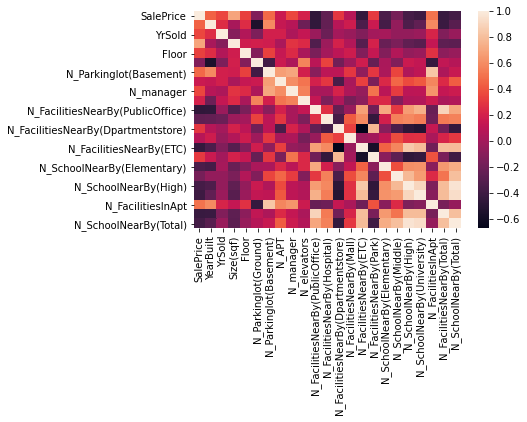

In [197]:
#Create a heatmap to visualise the correlations. 
sns.heatmap(corr)

Data Visualisations

In [143]:
#Import relevant libraries
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

#Convert PySpark DataFrame to Pandas DataFrame
df = data.toPandas()
df.head()

,SalePrice,YearBuilt,YrSold,MonthSold,Size(sqf),Floor,HallwayType,HeatingType,AptManageType,N_Parkinglot(Ground),...,N_FacilitiesNearBy(Mall),N_FacilitiesNearBy(ETC),N_FacilitiesNearBy(Park),N_SchoolNearBy(Elementary),N_SchoolNearBy(Middle),N_SchoolNearBy(High),N_SchoolNearBy(University),N_FacilitiesInApt,N_FacilitiesNearBy(Total),N_SchoolNearBy(Total)
0,141592,2006,2007,8,814,3,terraced,individual_heating,management_in_trust,111.0,...,1.0,1.0,0.0,3.0,2.0,2.0,2.0,5,6.0,9.0
1,51327,1985,2007,8,587,8,corridor,individual_heating,self_management,80.0,...,1.0,2.0,1.0,2.0,1.0,1.0,0.0,3,12.0,4.0
2,48672,1985,2007,8,587,6,corridor,individual_heating,self_management,80.0,...,1.0,2.0,1.0,2.0,1.0,1.0,0.0,3,12.0,4.0
3,380530,2006,2007,8,2056,8,terraced,individual_heating,management_in_trust,249.0,...,1.0,0.0,0.0,2.0,2.0,1.0,2.0,5,3.0,7.0
4,221238,1993,2007,8,1761,3,mixed,individual_heating,management_in_trust,523.0,...,1.0,5.0,0.0,4.0,3.0,5.0,5.0,4,14.0,17.0


C:\Users\user\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\user\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\user\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level 

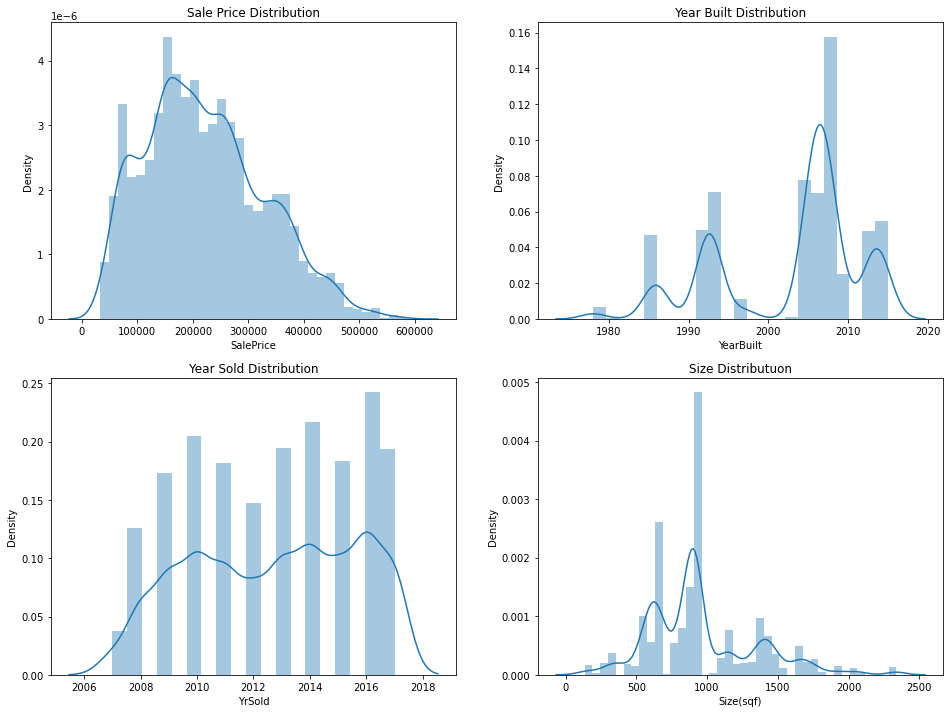

In [115]:
#Creast distribution plots of some key features

fig = plt.figure(figsize=(16,12))

ax1 = fig.add_subplot(221)
sns.distplot( a=df["SalePrice"], hist=True, kde=True, rug=False )
ax2 = fig.add_subplot(222)
sns.distplot( a=df["YearBuilt"], hist=True, kde=True, rug=False )
ax3 = fig.add_subplot(223)
sns.distplot( a=df["YrSold"], hist=True, kde=True, rug=False )
ax4 = fig.add_subplot(224)
sns.distplot( a=df["Size(sqf)"], hist=True, kde=True, rug=False )

ax1.title.set_text('Sale Price Distribution')
ax2.title.set_text('Year Built Distribution')
ax3.title.set_text('Year Sold Distribution')
ax4.title.set_text('Size Distributuon')

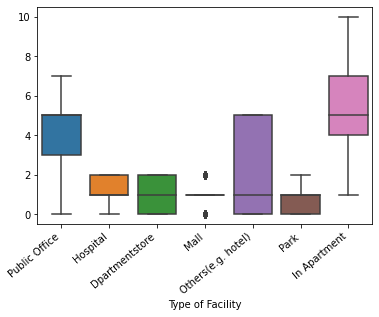

In [101]:
#Create boxplots for the facilities
facilities_list = ['N_FacilitiesNearBy(PublicOffice)','N_FacilitiesNearBy(Hospital)',
                   'N_FacilitiesNearBy(Dpartmentstore)', 'N_FacilitiesNearBy(Mall)',
                   'N_FacilitiesNearBy(ETC)','N_FacilitiesNearBy(Park)','N_FacilitiesInApt']


facilities = df.melt(value_vars=facilities_list)
new_facilities_list = ['Public Office','Hospital',
                   'Dpartmentstore', 'Mall',
                   'Others(e.g. hotel)','Park','In Apartment']
facilities.variable.replace(facilities_list,new_facilities_list, inplace= True)
facilities

plt.figure()
ax = sns.boxplot(data=facilities, x='variable', y='value')
plt.xlabel("Type of Facility")
ax.set(ylabel=None)
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
plt.show()

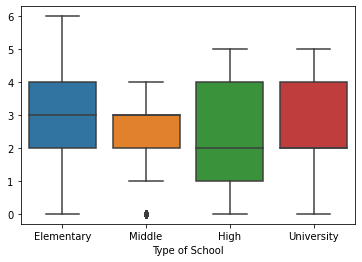

In [106]:
#Create boxplots for the schools
schools_list = ['N_SchoolNearBy(Elementary)', 'N_SchoolNearBy(Middle)',
                'N_SchoolNearBy(High)', 'N_SchoolNearBy(University)']
schools = df.melt(value_vars=schools_list)
new_school_list = ['Elementary','Middle', 'High','University']
schools.variable.replace(schools_list,new_school_list, inplace= True)
schools

plt.figure()
ax = sns.boxplot(data=schools, x='variable', y='value')
plt.xlabel("Type of School")
ax.set(ylabel=None)
plt.show()


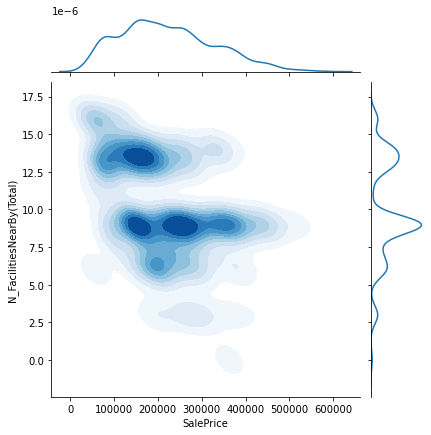

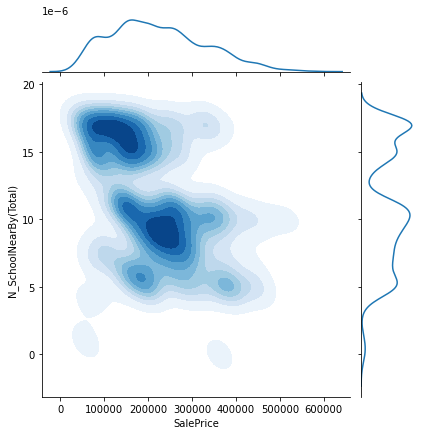

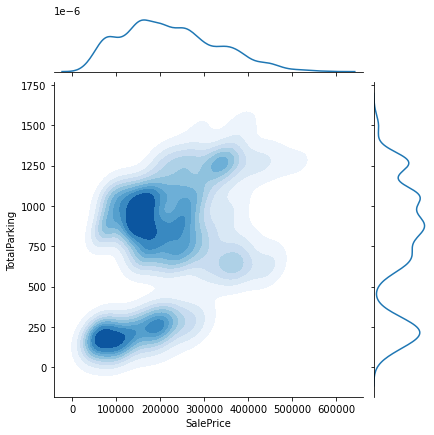

In [145]:
#Sale price vs total number of facilities nearby
sns.jointplot(data=df, x="SalePrice", y="N_FacilitiesNearBy(Total)",cmap="Blues", shade=True, kind='kde')

#Sale price vs total number of schools nearby
sns.jointplot(data=df, x="SalePrice", y="N_SchoolNearBy(Total)",cmap="Blues", shade=True, kind='kde')

#Sale price vs total number of parking spaces on the ground and basement
totalPark = df["N_Parkinglot(Ground)"] + df["N_Parkinglot(Basement)"]
df["TotalParking"] = df["N_Parkinglot(Ground)"] + df["N_Parkinglot(Basement)"]
sns.jointplot(data=df, x="SalePrice", y="TotalParking",cmap="Blues", shade=True, kind='kde')



(0.33672881603688776, 3.918360540721045e-156)

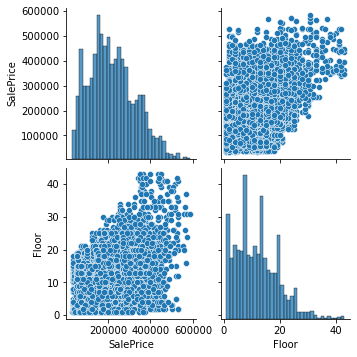

In [125]:
#Create pairplot for the sale price vs floor number
Cor_data=df[['SalePrice', 'Floor']]
sns.pairplot(Cor_data)

df['SalePrice'].corr(df['Floor'])

import scipy.stats  as stats
stats.pearsonr(df['SalePrice'], df['Floor'])

Using Pyspark to calculate the correlation between Sale Price and Floor number

In [134]:
from pyspark.ml.stat import Correlation
data.stat.corr("SalePrice","Floor")


0.33672881603688815

Categorcial Visualisations

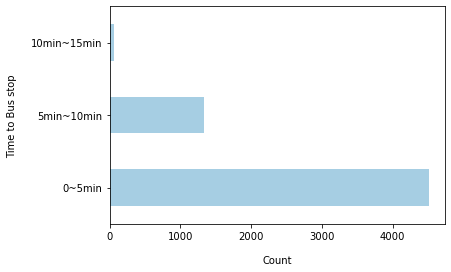

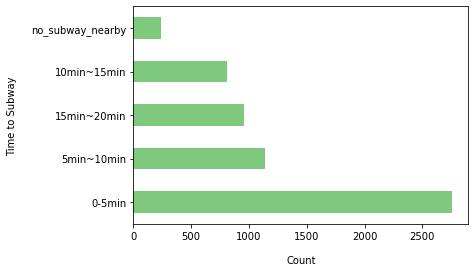

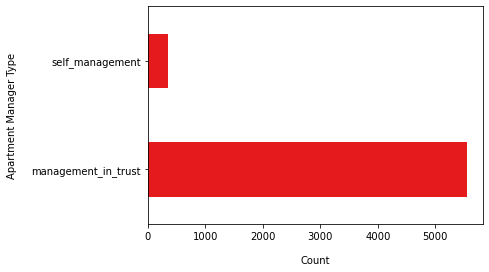

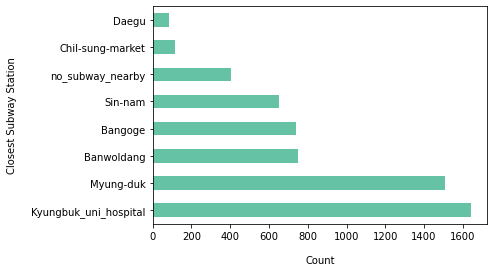

In [70]:
#Barplots of some categorical features
plt.figure()
df['TimeToBusStop'].value_counts().plot(kind='barh', colormap='Paired')
plt.xlabel("Count", labelpad=14)
plt.ylabel("Time to Bus stop", labelpad=14)
plt.show()

plt.figure()
df['TimeToSubway'].value_counts().plot(kind='barh', colormap='Accent')
plt.xlabel("Count", labelpad=14)
plt.ylabel("Time to Subway", labelpad=14)
plt.show()

plt.figure()
df['AptManageType'].value_counts().plot(kind='barh', colormap='Set1')
plt.xlabel("Count", labelpad=14)
plt.ylabel("Apartment Manager Type", labelpad=14)
plt.show()

plt.figure()
df['SubwayStation'].value_counts().plot(kind='barh',colormap='Set2')
plt.xlabel("Count", labelpad=14)
plt.ylabel("Closest Subway Station", labelpad=14)
plt.show()


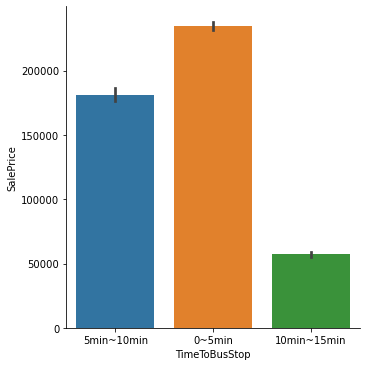

In [118]:
#Catplot of time to bus stop vs sale price
ax=sns.catplot(x="TimeToBusStop", y="SalePrice", kind="bar", data=df)

([<matplotlib.axis.XTick at 0x1c3ac8cc1f0>,
 [Text(0, 0, '10min~15min'),
  Text(1, 0, '5min~10min'),
  Text(2, 0, '0-5min'),
  Text(3, 0, '15min~20min'),
  Text(4, 0, 'no_subway_nearby')])

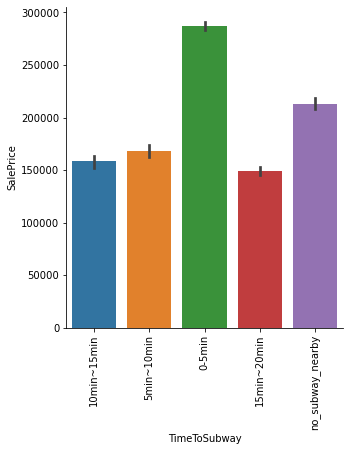

In [146]:
#Catplot of time to subway vs sale price
ax=sns.catplot(x="TimeToSubway", y="SalePrice", kind="bar", data=df)
plt.xticks(plt.xticks()[0], rotation=90)

([<matplotlib.axis.XTick at 0x1da611fe940>,
 [Text(0, 0, 'Kyungbuk_uni_hospital'),
  Text(1, 0, 'Daegu'),
  Text(2, 0, 'Sin-nam'),
  Text(3, 0, 'Myung-duk'),
  Text(4, 0, 'Chil-sung-market'),
  Text(5, 0, 'Bangoge'),
  Text(6, 0, 'Banwoldang'),
  Text(7, 0, 'no_subway_nearby')])

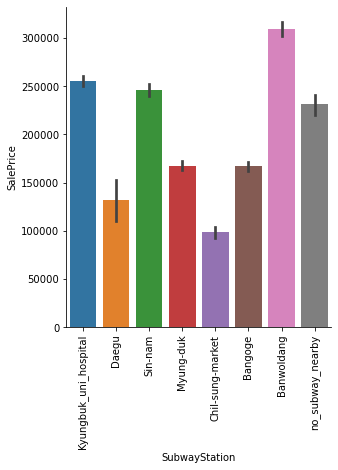

In [135]:
#Catplot of closest subway station vs sale price
ax=sns.catplot(x="SubwayStation", y="SalePrice", kind="bar", data=df)
plt.xticks(plt.xticks()[0], rotation=90)

([<matplotlib.axis.XTick at 0x1da56e1a730>,
 [Text(0, 0, 'Kyungbuk_uni_hospital'),
  Text(1, 0, 'Daegu'),
  Text(2, 0, 'Sin-nam'),
  Text(3, 0, 'Myung-duk'),
  Text(4, 0, 'Chil-sung-market'),
  Text(5, 0, 'Bangoge'),
  Text(6, 0, 'Banwoldang'),
  Text(7, 0, 'no_subway_nearby')])

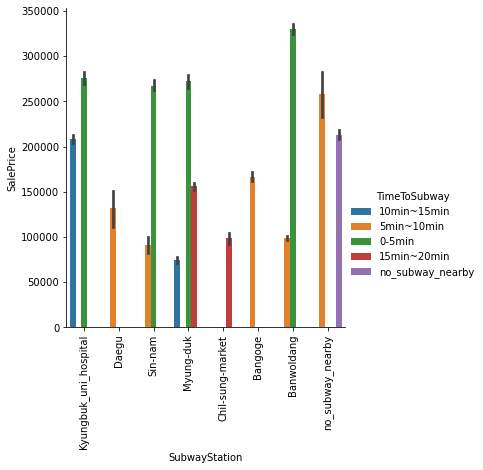

In [42]:
#Combine the last 2 catplots into one: Time to closest station vs sale price.
ax=sns.catplot(x="SubwayStation", y="SalePrice", hue="TimeToSubway", kind="bar", data=df)
plt.xticks(plt.xticks()[0], rotation=90)

<AxesSubplot:xlabel='AptManageType', ylabel='YearBuilt'>

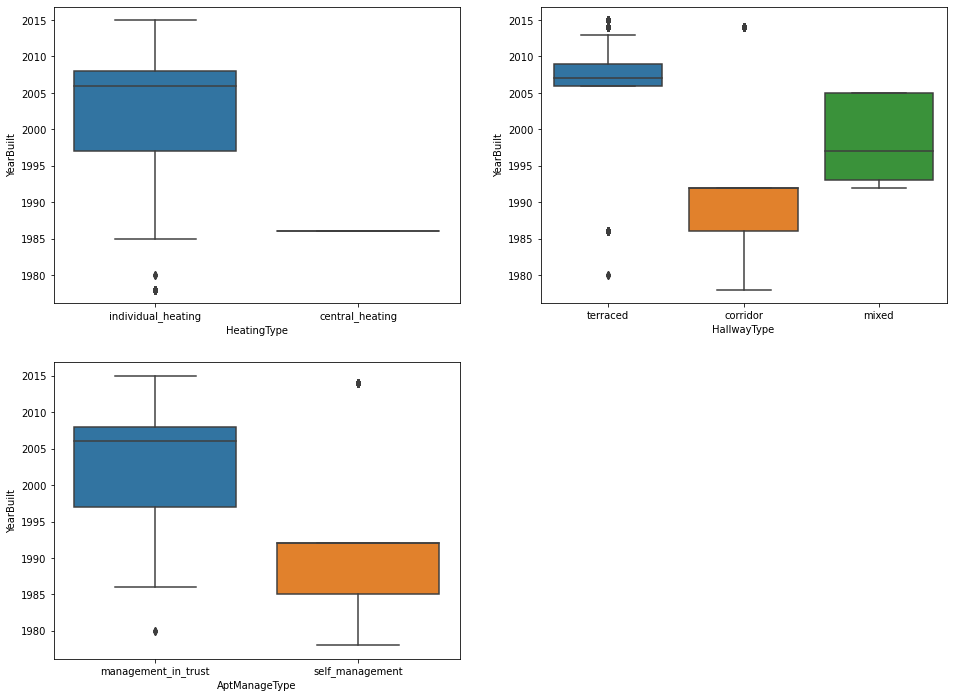

In [23]:
#Boxplots of other cayegorical features vs year built
plt.figure(figsize=(16,12))

plt.subplot(2,2,1)
sns.boxplot(y='YearBuilt', x='HeatingType',data=df)

plt.subplot(2,2,2)
sns.boxplot(y='YearBuilt', x='HallwayType',data=df)

plt.subplot(2,2,3)
sns.boxplot(y='YearBuilt', x='AptManageType',data=df)




Converting categorical variables into numerical form and assembling data into a vector.
Code adapted from: https://medium.com/@nutanbhogendrasharma/feature-transformer-vectorassembler-in-pyspark-ml-feature-part-3-b3c2c3c93ee9

In [57]:
#Specify the categorical and numerical variables (not including the target which is Sale price)    
catCols = ['HallwayType', 'HeatingType', 'AptManageType', 'TimeToBusStop', 'TimeToSubway', 
           'SubwayStation','YearBuilt', 'YrSold', 'MonthSold']
numCols = ['Size(sqf)','N_Parkinglot(Ground)', 'N_Parkinglot(Basement)', 'N_APT', 'N_manager', 
           'N_elevators', 'N_FacilitiesNearBy(PublicOffice)', 'N_FacilitiesNearBy(Hospital)', 
           'N_FacilitiesNearBy(Dpartmentstore)', 'N_FacilitiesNearBy(Mall)', 'N_FacilitiesNearBy(ETC)', 
           'N_FacilitiesNearBy(Park)', 'N_SchoolNearBy(Elementary)', 'N_SchoolNearBy(Middle)', 'N_SchoolNearBy(High)', 
           'N_SchoolNearBy(University)', 'N_FacilitiesInApt', 'N_FacilitiesNearBy(Total)', 'N_SchoolNearBy(Total)']

In [58]:
#Import relevant libraries 
from pyspark.ml.feature import StringIndexer
from pyspark.ml.feature import OneHotEncoder
from pyspark.ml.feature import VectorAssembler
from pyspark.ml import Pipeline
from pyspark .ml.feature import StandardScaler

In [59]:
#Apply string indexer to catergorical variables
HallwayType_indexer = StringIndexer(inputCol="HallwayType", outputCol="HallwayTypeIndex")
HeatingType_indexer = StringIndexer(inputCol="HeatingType", outputCol="HeatingTypeIndex")
AptManageType_indexer = StringIndexer(inputCol="AptManageType", outputCol="AptManageTypeIndex")
TimeToBusStop_indexer = StringIndexer(inputCol="TimeToBusStop", outputCol="TimeToBusStopIndex")
TimeToSubway_indexer = StringIndexer(inputCol="TimeToSubway", outputCol="TimeToSubwayIndex")
SubwayStation_indexer = StringIndexer(inputCol="SubwayStation", outputCol="SubwayStationIndex")
YearBuilt_indexer = StringIndexer(inputCol="YearBuilt", outputCol="YearBuiltIndex")
YrSold_indexer = StringIndexer(inputCol="YrSold", outputCol="YrSoldIndex")
MonthSold_indexer = StringIndexer(inputCol="MonthSold", outputCol="MonthSoldIndex")




In [18]:
#Apply one hot encoder
onehot_encoder = OneHotEncoder(inputCols=[ 'HallwayTypeIndex','HeatingTypeIndex','AptManageTypeIndex',
                                          'TimeToBusStopIndex', 'TimeToSubwayIndex','SubwayStationIndex', 
                                          'YearBuiltIndex', 'YrSoldIndex', 'MonthSoldIndex'], 
                               outputCols=["HallwayType_vec", "HeatingType_vec","AptManageType_vec",
                                           "TimeToBusStop_vec","TimeToSubway_vec","SubwayStation_vec",
                                          'YearBuilt_vec', 'YrSold_vec', 'MonthSold_vec'])

In [60]:
#Make pipeline
pipeline = Pipeline(stages=[HallwayType_indexer, HeatingType_indexer, AptManageType_indexer,
                            TimeToBusStop_indexer, TimeToSubway_indexer, SubwayStation_indexer,
                            YearBuilt_indexer,YrSold_indexer,MonthSold_indexer,
                            onehot_encoder])

#Fit & transform the data by the pipeline
data_transformed = pipeline.fit(data).transform(data)
data_transformed.show()

+---------+---------+------+---------+---------+-----+-----------+------------------+-------------------+--------------------+----------------------+-------------+------------+-----+---------+-----------+--------------------+--------------------------------+----------------------------+----------------------------------+------------------------+-----------------------+------------------------+--------------------------+----------------------+--------------------+--------------------------+-----------------+-------------------------+---------------------+----------------+----------------+------------------+------------------+-----------------+------------------+--------------+-----------+--------------+---------------+---------------+---------------+---------------+-----------------+----------+----------------+-----------------+-----------------+
|SalePrice|YearBuilt|YrSold|MonthSold|Size(sqf)|Floor|HallwayType|       HeatingType|      AptManageType|N_Parkinglot(Ground)|N_Parkinglot(Bas

In [61]:
#Numerical data needs scaling but must be in vector form to do this.

#Use VectorAssembler to form a vector of the numerical features
assembler = VectorAssembler(inputCols= numCols, outputCol="numFeatures")
data_2 = assembler.transform(data_transformed)

#Use StandardScaler to scale
scaler = StandardScaler(inputCol="numFeatures", outputCol="scaled_features")
scaler_model = scaler.fit(data_2)
scaled_data = scaler_model.transform(data_2)

#view scaled data
scaled_data

DataFrame[SalePrice: int, YearBuilt: int, YrSold: int, MonthSold: int, Size(sqf): int, Floor: int, HallwayType: string, HeatingType: string, AptManageType: string, N_Parkinglot(Ground): double, N_Parkinglot(Basement): double, TimeToBusStop: string, TimeToSubway: string, N_APT: double, N_manager: double, N_elevators: double, SubwayStation: string, N_FacilitiesNearBy(PublicOffice): double, N_FacilitiesNearBy(Hospital): int, N_FacilitiesNearBy(Dpartmentstore): double, N_FacilitiesNearBy(Mall): double, N_FacilitiesNearBy(ETC): double, N_FacilitiesNearBy(Park): double, N_SchoolNearBy(Elementary): double, N_SchoolNearBy(Middle): double, N_SchoolNearBy(High): double, N_SchoolNearBy(University): double, N_FacilitiesInApt: int, N_FacilitiesNearBy(Total): double, N_SchoolNearBy(Total): double, HallwayTypeIndex: double, HeatingTypeIndex: double, AptManageTypeIndex: double, TimeToBusStopIndex: double, TimeToSubwayIndex: double, SubwayStationIndex: double, YearBuiltIndex: double, YrSoldIndex: doubl

In [62]:
#Assemble the one-hot encoded and scaled numerical features into a vector column
inputCols = ['MonthSold_vec', 'YearBuilt_vec', 'HeatingType_vec', 'HallwayType_vec', 
             'AptManageType_vec', 'YrSold_vec', 'TimeToSubway_vec', 'TimeToBusStop_vec', 
             'SubwayStation_vec', 'scaled_features']

vector_assembler = VectorAssembler(inputCols=inputCols, outputCol='features')
final_data = vector_assembler.transform(scaled_data)
final_data.show()

+---------+---------+------+---------+---------+-----+-----------+------------------+-------------------+--------------------+----------------------+-------------+------------+-----+---------+-----------+--------------------+--------------------------------+----------------------------+----------------------------------+------------------------+-----------------------+------------------------+--------------------------+----------------------+--------------------+--------------------------+-----------------+-------------------------+---------------------+----------------+----------------+------------------+------------------+-----------------+------------------+--------------+-----------+--------------+---------------+---------------+---------------+---------------+-----------------+----------+----------------+-----------------+-----------------+--------------------+--------------------+--------------------+
|SalePrice|YearBuilt|YrSold|MonthSold|Size(sqf)|Floor|HallwayType|       Heatin

In [63]:
#Select the features and the target (sales price).
final_data = final_data.select(['features','SalePrice'])
final_data.show()

+--------------------+---------+
|            features|SalePrice|
+--------------------+---------+
|(72,[6,14,26,27,2...|   141592|
|(72,[6,24,26,41,4...|    51327|
|(72,[6,24,26,41,4...|    48672|
|(72,[6,14,26,27,2...|   380530|
|(72,[6,13,26,28,2...|   221238|
|(72,[6,15,26,29,4...|    35840|
|(72,[6,15,26,28,4...|    78318|
|(72,[6,13,26,28,2...|    61946|
|(72,[6,13,26,28,2...|    84070|
|(72,[6,15,26,28,4...|    83185|
|(72,[6,18,27,29,4...|   168141|
|(72,[6,18,27,29,4...|   153982|
|(72,[6,11,26,27,2...|   200884|
|(72,[10,24,26,41,...|    60176|
|(72,[10,18,26,29,...|    93362|
|(72,[10,13,26,28,...|   185840|
|(72,[10,13,26,28,...|   120796|
|(72,[10,15,26,29,...|    64601|
|(72,[10,13,26,28,...|   176991|
|(72,[10,15,26,29,...|    55752|
+--------------------+---------+
only showing top 20 rows



Train Test Split

In [23]:
#7:25 train-test split
train_data, test_data = final_data.randomSplit([0.75, 0.25])

In [90]:
train_data.describe().show()

+-------+------------------+
|summary|         SalePrice|
+-------+------------------+
|  count|              4449|
|   mean|221592.60193301865|
| stddev|106941.06889947574|
|    min|             32743|
|    max|            570796|
+-------+------------------+



In [91]:
test_data.describe().show()

+-------+------------------+
|summary|         SalePrice|
+-------+------------------+
|  count|              1442|
|   mean|220062.70110957004|
| stddev|104675.61251457763|
|    min|             34513|
|    max|            585840|
+-------+------------------+



Conduct Linear Regression

In [95]:
from pyspark.ml.regression import LinearRegression

In [124]:
lr = LinearRegression(featuresCol = 'features', labelCol = 'SalePrice')

In [125]:
lr_model = lr.fit(train_data)

Evaluation metrics on training datatraining data. 

In [126]:
#Training Evaluation Metrics 
trainingSummary = lr_model.summary
#Root Mean Square error
print("RMSE: %f" % trainingSummary.rootMeanSquaredError)
#r2
print("r2: %f" % trainingSummary.r2)

train_data.describe().show()

RMSE: 32776.387486
r2: 0.906043
+-------+------------------+
|summary|         SalePrice|
+-------+------------------+
|  count|              4449|
|   mean|221592.60193301865|
| stddev|106941.06889947574|
|    min|             32743|
|    max|            570796|
+-------+------------------+



Apply model to unseen test data.

In [170]:
#Apply model to test data
lr_predictions = lr_model.transform(test_data)
#To see the predicted values
lr_predictions.select('prediction', 'SalePrice').show(5)

+------------------+---------+
|        prediction|SalePrice|
+------------------+---------+
|233811.82959791232|   247787|
|199785.83020529198|   215044|
|  337030.793809865|   448672|
|247728.78966915724|   228318|
|247728.78966915724|   252212|
+------------------+---------+
only showing top 5 rows



In [172]:
#Generate RMSE and R-Squared evaluators
from pyspark.ml.evaluation import RegressionEvaluator
rmse_evaluator = RegressionEvaluator(labelCol="SalePrice", 
                                     predictionCol="prediction", 
                                     metricName="rmse")

r2_evaluator = RegressionEvaluator(labelCol="SalePrice",
                                   predictionCol="prediction",
                                   metricName="r2")

#Apply the evaluators to logistic regression predictions
#RMSE
lr_rmse = rmse_evaluator.evaluate(lr_predictions)
print("Root Mean Squared Error (RMSE) on test data = %g" % lr_rmse)
#R-Squared
lr_r2 =  r2_evaluator.evaluate(lr_predictions)
print("R Squared (R2) on test data = %g" % lr_r2)

#Show train data distribution so RMSE can be compared to it
train_data.describe().show()

Root Mean Squared Error (RMSE) on test data = 32877.6
R Squared (R2) on test data = 0.901279
+-------+------------------+
|summary|         SalePrice|
+-------+------------------+
|  count|              4449|
|   mean|221592.60193301865|
| stddev|106941.06889947574|
|    min|             32743|
|    max|            570796|
+-------+------------------+



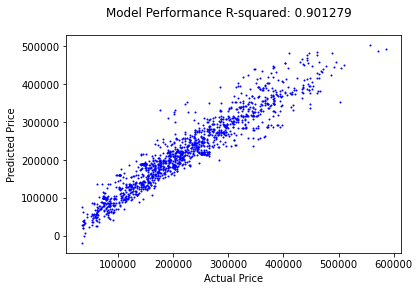

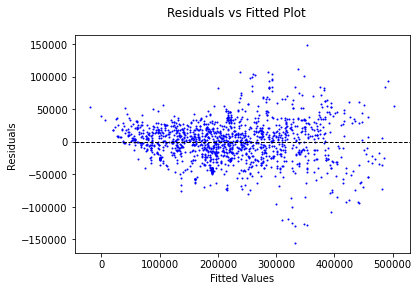

In [177]:
#Convert prediction results to a Pandas DataFrame and generate plots
lr_predictions = lr_predictions.toPandas()

#Actual vs Predicted Price
plt.plot(lr_predictions.SalePrice, lr_predictions.prediction, 'bo', markersize=1)
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.suptitle("Model Performance R-squared: %f" % lr_r2)
plt.show()

#Add residual column to Pandas DataFrame
lr_predictions = lr_predictions.assign(Residual=lambda x: (x['SalePrice'] - x['prediction']))

#Plot Residual vs sale price
plt.plot(lr_predictions.prediction, lr_predictions.Residual, 'bo', markersize=1)
plt.axhline(y=0, color='black', linestyle='--', linewidth=1)
plt.xlabel('Fitted Values')
plt.ylabel('Residuals')
plt.suptitle("Residuals vs Fitted Plot")
plt.show()



Gradient Boosted Regression

In [142]:
from pyspark.ml.regression import GBTRegressor
gbt = GBTRegressor(featuresCol = 'features', labelCol = 'SalePrice', maxIter=10)
gbt_model = gbt.fit(train_data)
gbt_predictions = gbt_model.transform(test_data)
gbt_predictions.select('prediction', 'SalePrice').show(5)

+------------------+---------+
|        prediction|SalePrice|
+------------------+---------+
| 261653.5199451142|   247787|
| 223681.9665357602|   215044|
| 463007.7221717166|   448672|
|240555.24958704365|   228318|
|240555.24958704365|   252212|
+------------------+---------+
only showing top 5 rows



In [179]:
#RMSE for gbt model
gbt_rmse = rmse_evaluator.evaluate(gbt_predictions)
print("Root Mean Squared Error (RMSE) on test data = %g" % gbt_rmse)
#R-squared for gbt model
gbt_r2 = r2_evaluator.evaluate(gbt_predictions)
print("R Squared (R2) on test data = %g" % gbt_r2)

Root Mean Squared Error (RMSE) on test data = 27608
R Squared (R2) on test data = 0.930389


<Figure size 432x288 with 0 Axes>

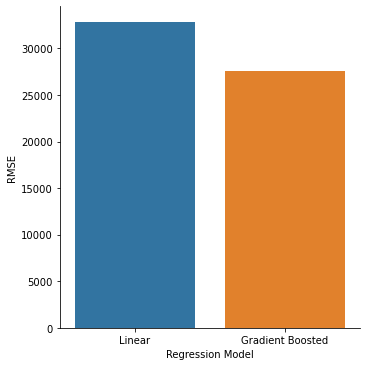

<Figure size 432x288 with 0 Axes>

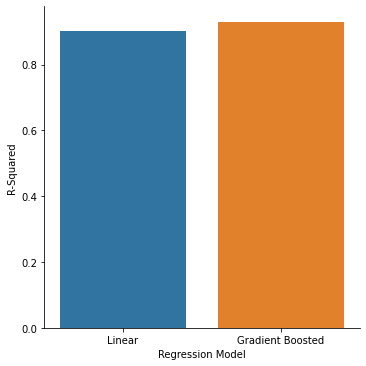

In [141]:
#Creat dataframe with results and plot them
df = pd.DataFrame({'Regression Model':['Linear', 'Gradient Boosted'], 
                   'RMSE':[lr_rmse, gbt_rmse],
                   'R-Squared':[lr_r2, gbt_r2]})

plt.figure()
sns.catplot(x='Regression Model', y='RMSE', kind="bar", data=df)
plt.show()

plt.figure()
sns.catplot(x='Regression Model', y='R-Squared', kind="bar", data=df)
plt.show()

